In [1]:
# Deep Neural Network

# import related package
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt

# import keras pacakge
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # one-hot-encoding  

# import MNIST dataset
from keras.datasets import mnist
# https://en.wikipedia.org/wiki/MNIST_database

Using TensorFlow backend.


In [2]:
# data preprocess as training and testing datasets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# review data shape
def d_s(X_train, y_train, X_test, y_test):
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)
    
d_s(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


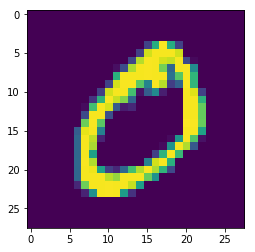

In [4]:
# print
plt.imshow(X_train[1])
plt.show() 

In [5]:
# review pixel
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# 1, Model selection and setting

model = Sequential()

# Input layer and hidden layer  (256 is Hyperparameter )
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu')) 

# Output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [7]:
# 2, Model compile setting

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [8]:
# training data reshape

X_train_2D = X_train.reshape(60000, 28*28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28*28).astype('float32')  

# normalization
x_Train_norm = X_train_2D/255
x_Test_norm = X_test_2D/255

In [9]:
# review train data after normalization
x_Train_norm[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
# for y value: one-hot encoding  (result comparision)

y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

In [11]:
# check
y_train[1]

0

In [12]:
# check
y_TrainOneHot[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 3, Model training and execution

train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, validation_split=0.3, epochs=30, batch_size=800, verbose=2)  


Train on 42000 samples, validate on 18000 samples
Epoch 1/30
 - 1s - loss: 0.0909 - acc: 0.0893 - val_loss: 0.0907 - val_acc: 0.0949
Epoch 2/30
 - 1s - loss: 0.0908 - acc: 0.0927 - val_loss: 0.0906 - val_acc: 0.0980
Epoch 3/30
 - 1s - loss: 0.0906 - acc: 0.0960 - val_loss: 0.0904 - val_acc: 0.1018
Epoch 4/30
 - 1s - loss: 0.0905 - acc: 0.1007 - val_loss: 0.0903 - val_acc: 0.1068
Epoch 5/30
 - 1s - loss: 0.0903 - acc: 0.1047 - val_loss: 0.0901 - val_acc: 0.1123
Epoch 6/30
 - 1s - loss: 0.0902 - acc: 0.1088 - val_loss: 0.0900 - val_acc: 0.1175
Epoch 7/30
 - 1s - loss: 0.0900 - acc: 0.1139 - val_loss: 0.0899 - val_acc: 0.1232
Epoch 8/30
 - 1s - loss: 0.0899 - acc: 0.1196 - val_loss: 0.0897 - val_acc: 0.1292
Epoch 9/30
 - 1s - loss: 0.0897 - acc: 0.1264 - val_loss: 0.0896 - val_acc: 0.1351
Epoch 10/30
 - 1s - loss: 0.0896 - acc: 0.1341 - val_loss: 0.0894 - val_acc: 0.1414
Epoch 11/30
 - 1s - loss: 0.0894 - acc: 0.1415 - val_loss: 0.0893 - val_acc: 0.1494
Epoch 12/30
 - 1s - loss: 0.0893 - 

In [15]:
# 4, Model evaluation  (Result of Loss and Accuracy)

scoreTrain = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Infomation] Accuracy of testing data = {:2.2f}%".format(scoreTrain[1]*100.0))  


60000/60000 [==============================] - 2s 27us/step

	[Infomation] Accuracy of testing data = 30.08%


In [16]:
# check
print(model.metrics_names)

['loss', 'acc']


In [17]:
# check
scoreTrain

[0.08628419015407562, 0.3008166666666667]

In [18]:
# 4, Model evaluation  (Result of Loss and Accuracy)

scoreTest = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scoreTest[1]*100.0))  


10000/10000 [==============================] - 0s 29us/step

	[Info] Accuracy of testing data = 30.3%


In [19]:
# check
scoreTest

[0.08617332644462586, 0.3027]

In [20]:
# 5, Prediction

X = x_Test_norm[0:30,:]
predictions = model.predict_classes(X)

In [21]:
# get prediction result
print(predictions)

[7 0 1 0 4 2 2 8 0 7 0 0 7 0 0 8 4 7 8 0 7 8 0 0 8 0 0 7 0 1]


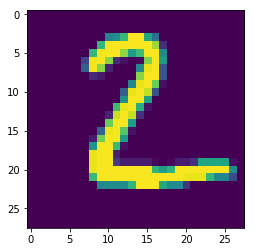

In [22]:
# show first picture
plt.imshow(X_test[1])
plt.show() 

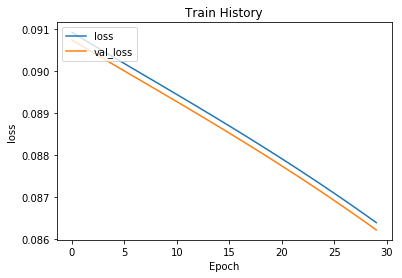

In [23]:
# plt
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 


In [24]:
# end